# Fraud Analysis 

## Data Introduction 

In [1]:
import pandas as pd
import numpy as np
import tkinter as tk
import matplotlib.pyplot as plt
import matplotlib as mpl
from tkinter import filedialog
from pandas import DataFrame
import seaborn as sns

In [2]:
# Upload Data  
train_benFile= "C:/Users/Nicole/Desktop/fraud_detection/Train_Beneficiarydata-1542865627584.csv"
train_ben= pd.read_csv(train_benFile)
train_ben


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,...,2,2,2,2,2,2,0,0,430,460
138552,BENE159195,1938-12-01,NaN,2,1,0,49,530,12,12,...,2,1,2,2,2,2,0,0,880,100
138553,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,...,1,1,1,2,2,2,2000,1068,3240,1390
138554,BENE159197,1930-01-01,NaN,1,1,0,16,560,12,12,...,2,2,1,2,2,2,0,0,2650,10


In [3]:
train_inpatientFile= "C:/Users/Nicole/Desktop/fraud_detection/Train_Inpatientdata-1542865627584.csv"
train_inpatient= pd.read_csv(train_inpatientFile)
train_inpatient

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,...,79092,70704,2869,4148,9904.0,NaN,NaN,NaN,NaN,NaN
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,49122,4254,5990,NaN,8605.0,NaN,NaN,NaN,NaN,NaN
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,71534,71590,V4502,NaN,9390.0,NaN,NaN,NaN,NaN,NaN
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,4263,0414,41400,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
train_outpatientFile= "C:/Users/Nicole/Desktop/fraud_detection/Train_Outpatientdata-1542865627584.csv"
train_outpatient= pd.read_csv(train_outpatientFile)
train_outpatient 

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,2163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,07041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,V570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


#### Test Sets 

In [5]:
test_benFile= "C:/Users/Nicole/Desktop/fraud_detection/Test_Beneficiarydata-1542969243754.csv"
test_ben= pd.read_csv(test_benFile)
test_ben

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,2,1,1,1,2,2,0,0,1170,660
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,1938-04-01,NaN,2,1,Y,45,780,12,12,...,1,2,1,2,2,2,21260,2136,120,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63963,BENE159187,1959-07-01,NaN,1,1,0,27,140,12,12,...,1,1,1,2,2,2,0,0,2650,450
63964,BENE159193,1936-12-01,NaN,2,1,0,36,170,12,12,...,2,2,2,2,2,2,0,0,110,50
63965,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,...,2,2,2,2,2,2,0,0,430,460
63966,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,...,1,1,1,2,2,2,2000,1068,3240,1390


In [6]:
test_inpatientFile= "C:/Users/Nicole/Desktop/fraud_detection/Test_Inpatientdata-1542969243754.csv"
test_inpatient= pd.read_csv(test_inpatientFile)
test_inpatient

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,...,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,...,V6109,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,BENE159139,CLM61015,2009-07-24,2009-07-26,PRV55021,23000,PHY406228,PHY406228,NaN,2009-07-24,...,53540,5715,56210,NaN,5122.0,4019.0,NaN,NaN,NaN,NaN
9547,BENE159143,CLM42885,2009-03-16,2009-03-29,PRV55017,34000,PHY354080,NaN,NaN,2009-03-16,...,78720,72402,V5413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9548,BENE159155,CLM67124,2009-09-07,2009-10-12,PRV53758,5000,PHY338118,NaN,NaN,2009-09-07,...,E8798,60000,28521,4280,NaN,NaN,NaN,NaN,NaN,NaN
9549,BENE159181,CLM72016,2009-10-14,2009-10-17,PRV57195,3000,PHY328451,NaN,NaN,2009-10-14,...,2724,25080,29383,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
test_outpatientFile= "C:/Users/Nicole/Desktop/fraud_detection/Test_Outpatientdata-1542969243754.csv"
test_outpatient= pd.read_csv(test_outpatientFile)
test_outpatient 

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11007,CLM496381,2009-07-29,2009-07-29,PRV56573,10,PHY393253,PHY347995,NaN,58889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5939
4,BENE11007,CLM521391,2009-08-12,2009-08-12,PRV56573,10,PHY417685,NaN,PHY382041,V666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125836,BENE159193,CLM469576,2009-07-14,2009-07-14,PRV55485,70,PHY431265,NaN,NaN,79021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
125837,BENE159193,CLM483842,2009-07-22,2009-07-22,PRV55485,10,PHY369098,NaN,NaN,72811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
125838,BENE159193,CLM554925,2009-08-31,2009-08-31,PRV55485,30,PHY431298,NaN,NaN,9181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,92420
125839,BENE159194,CLM347777,2009-05-08,2009-05-08,PRV55889,30,PHY406767,NaN,PHY406767,V4582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


### Merged Datasets for Train and Test 

#### Since we will most likely clean both the train and test sets, it makes sense to remerge the inpatient and outpatient test and train set 

In [8]:
frames_outpatient= [train_outpatient, test_outpatient]

In [9]:
merged_outpatient= pd.concat(frames_outpatient)
merged_outpatient

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125836,BENE159193,CLM469576,2009-07-14,2009-07-14,PRV55485,70,PHY431265,NaN,NaN,79021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
125837,BENE159193,CLM483842,2009-07-22,2009-07-22,PRV55485,10,PHY369098,NaN,NaN,72811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
125838,BENE159193,CLM554925,2009-08-31,2009-08-31,PRV55485,30,PHY431298,NaN,NaN,9181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,92420
125839,BENE159194,CLM347777,2009-05-08,2009-05-08,PRV55889,30,PHY406767,NaN,PHY406767,V4582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [10]:
frames_inpatient= [train_inpatient, test_inpatient]

In [11]:
merged_inpatient= pd.concat(frames_inpatient)
merged_inpatient

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,BENE159139,CLM61015,2009-07-24,2009-07-26,PRV55021,23000,PHY406228,PHY406228,NaN,2009-07-24,...,53540,5715,56210,NaN,5122.0,4019.0,NaN,NaN,NaN,NaN
9547,BENE159143,CLM42885,2009-03-16,2009-03-29,PRV55017,34000,PHY354080,NaN,NaN,2009-03-16,...,78720,72402,V5413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9548,BENE159155,CLM67124,2009-09-07,2009-10-12,PRV53758,5000,PHY338118,NaN,NaN,2009-09-07,...,E8798,60000,28521,4280,NaN,NaN,NaN,NaN,NaN,NaN
9549,BENE159181,CLM72016,2009-10-14,2009-10-17,PRV57195,3000,PHY328451,NaN,NaN,2009-10-14,...,2724,25080,29383,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
frames_ben= [train_ben,test_ben]

In [13]:
merged_ben= pd.concat(frames_ben)
merged_ben

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63963,BENE159187,1959-07-01,NaN,1,1,0,27,140,12,12,...,1,1,1,2,2,2,0,0,2650,450
63964,BENE159193,1936-12-01,NaN,2,1,0,36,170,12,12,...,2,2,2,2,2,2,0,0,110,50
63965,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,...,2,2,2,2,2,2,0,0,430,460
63966,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,...,1,1,1,2,2,2,2000,1068,3240,1390


### Number of Unique Beneficiaries, Providers and Claims in each Dataset 

#### Number of Unique Beneficiaries in each Set 

In [14]:
merged_ben['BeneID'].nunique()

148072

In [15]:
merged_inpatient['BeneID'].nunique()

37418

In [16]:
merged_outpatient['BeneID'].nunique()

144189

#### Number of Unique Claim Ids in each Set 

In [17]:
merged_outpatient['ClaimID'].nunique()

643578

In [18]:
merged_inpatient['ClaimID'].nunique()

50025

#### Number of Unique Providers in each Set 

In [19]:
merged_outpatient['Provider'].nunique()

6271

In [20]:
merged_inpatient['Provider'].nunique()

2612

### Should we merge the inpatient and outpatient information given that there are some patients and/or providers that are both in the inpatient and outpatient datasets?  

Based on background knowledge, inpatient and outpatient services are different and so the providers would be different hence there should be no overlap. However, we will confirm nonetheless. We do this by checking if there are patients in the inpatient file that are also in the outpatient file. 

In [21]:
ben_list_inpatient= merged_inpatient['BeneID'].unique()
ben_in= pd.DataFrame(ben_list_inpatient)
ben_in

,0
0,BENE11001
1,BENE11011
2,BENE11014
3,BENE11017
4,BENE11018
...,...
37413,BENE159117
37414,BENE159139
37415,BENE159155
37416,BENE159181


In [22]:
# create a list with all unique beneficiary IDs in the outpatient dataset. 
ben_list_outpatient= merged_outpatient['BeneID'].unique()
# convert list to a df 
ben_out= pd.DataFrame(ben_list_outpatient)
ben_out

,0
0,BENE11002
1,BENE11003
2,BENE11004
3,BENE11005
4,BENE11006
...,...
144184,BENE159088
144185,BENE159135
144186,BENE159144
144187,BENE159149


In [23]:
# create another list which contains entries that are both in outpatient and inpatient file 
overlap=ben_out.isin(ben_in)
# to access the .unique() function, we convert overlap to a series 
overlap= overlap.squeeze()
type(overlap)

# Since there are no "True"values, then we do not have any overlap
overlap.unique()


array([False])

In [24]:
# we do the same for providers  
prov_list_inpatient= merged_inpatient['Provider'].unique()
prov_in= pd.DataFrame(prov_list_inpatient)
prov_in

,0
0,PRV55912
1,PRV55907
2,PRV56046
3,PRV52405
4,PRV56614
...,...
2607,PRV56817
2608,PRV54826
2609,PRV54987
2610,PRV52023


In [25]:
prov_list_outpatient= merged_outpatient['Provider'].unique()
prov_out= pd.DataFrame(prov_list_outpatient)
prov_out

,0
0,PRV56011
1,PRV57610
2,PRV57595
3,PRV55951
4,PRV55903
...,...
6266,PRV56372
6267,PRV54617
6268,PRV53736
6269,PRV53089


In [26]:
overlap_prov=prov_out.isin(prov_in)
overlap_prov= overlap_prov.squeeze()
type(overlap_prov)

overlap_prov.unique()

array([False])

### There is no overlap and so there is no value in merging the inpatient and outpatient files. This simplifies our workflow. Now we need to merge the beneficiary information to both the inpatient and outpatient datasets. However, it makes sense to 'clean'  the beneficiary dataset  before merging it with the inpatient and outpatient datasets.

In [27]:
tmp_ben1= merged_ben
#tmp_ben1['RenalDiseaseIndicator'].unique()

In [28]:
tmp_ben1['RenalDiseaseIndicator']= tmp_ben1['RenalDiseaseIndicator'].astype(str)

In [29]:
 def renal_cleaner (df): 
    len_renal= len(df)
    df2= []
    for i in range(len_renal): 
        val= df.iloc[i]['RenalDiseaseIndicator']
        if val == 'Y':
            val= 1
            df2.append(val)
        else:
            df2.append(val)
    return df2
        

In [30]:
j=renal_cleaner(tmp_ben1)
j

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 1,
 '0',
 '0',
 '0',
 '0',
 1,
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 1,
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 1,
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 1,
 '0',
 1,
 '0',
 '0',
 '0',
 '0',
 '0',
 1,
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 1,
 '0',
 '0',
 '0',
 1,
 1,
 '0',
 1,
 '0',
 '0',
 '0',
 '0',
 1,
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 1,
 '0',
 '0',
 1,
 '0',
 '0',
 '0',
 '0',
 1,
 '0',
 '0',
 '0',
 '0',
 1,
 1,
 '0',
 '0',
 '0',
 1,
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 1,
 '0',
 '0',
 1,
 '0',
 '0',
 1,
 '0',
 '0',
 '0',
 1,
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 1,
 1,
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 1,
 1,
 '0',
 '0',
 '0',
 '

In [31]:
tmp_ben1['RenalDiseaseIndicator']= j 

In [32]:
## Only col with severl null values is the DOD col
tmp_ben1.isnull().sum()

BeneID                                  0
DOB                                     0
DOD                                200529
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

### Merge Changes 

#### We do the same check and for the inpatient dataset, we get a df with 76827 rows × 54 columns which is correct. 

In [33]:
tmp_in= merged_inpatient
tmp_in['ClaimID'].nunique()

50025

In [34]:
tmp_ben1['BeneID'].nunique()

148072

In [35]:
inner_join_in=pd.merge(tmp_in,tmp_ben1, on='BeneID', how='inner')
inner_join_in['ClaimID'].nunique()

50025

In [36]:
inner_join_in['BeneID'].nunique()

37418

In [37]:
inner_join_in['ClaimID'].nunique()

50025

In [38]:
meh=inner_join_in.drop_duplicates(subset=['ClaimID'], keep= False)
type(meh)

pandas.core.frame.DataFrame

In [39]:
meh['ClaimID'].nunique()

23223

## Fix Zone 

In [40]:
ben_Inp= inner_join_in['BeneID'].unique().tolist()
ben_Inp= pd.DataFrame(ben_Inp, columns = ['BeneID'])

ben_Inp.dtypes


BeneID    object
dtype: object

In [41]:
ben_Master= merged_ben['BeneID'].unique().tolist()
ben_Master= pd.DataFrame(ben_Master, columns = ['BeneID']).astype('str')


In [42]:
met=pd.concat([ben_Inp,ben_Master], axis=1)

In [43]:
def misisngClaims (df1, df2):
    len1= len(df1)
    #len2= len(df2)
    df3=[]
    for i in range(len1):
        if str(df2.BenMaster).isin(df1.BenInp) == True:
            df3.append('Here')
        else:
            df3.append(df1.BenInp[i])
    return df3
    

In [44]:
ret= pd.merge(ben_Inp,ben_Master, on='BeneID', how='inner')
ret['BeneID'].nunique

<bound method IndexOpsMixin.nunique of 0         BENE11001
1         BENE11011
2         BENE11014
3         BENE11017
4         BENE11018
            ...    
37413    BENE159117
37414    BENE159139
37415    BENE159155
37416    BENE159181
37417    BENE159196
Name: BeneID, Length: 37418, dtype: object>

### Unhelpful NaNs

#### For Inpatient dataset, it is worth keeping the column ClmDiagnosisCode_n up to n=10. As for .ClmProcedureCode_n, we can definately drop  'ClmProcedureCode_6' and keep the rest

In [45]:
inner_join_in.ClmDiagnosisCode_10.unique()

array([nan, '4280', '41401', ..., '78550', '5651', '60091'], dtype=object)

In [46]:
inner_join_in.ClmProcedureCode_6.unique()

array([nan])

In [47]:
inner_join_in.ClmProcedureCode_5.unique()

array([  nan, 4139., 5185., 9972., 4422., 2724., 9971., 9982.])

In [48]:
inner_join_in.ClmProcedureCode_4.unique()

array([  nan,   42., 4414., 4104., 7999., 1122., 5849., 2724., 4439.,
        496., 4011., 3572., 4019., 6822.,  185., 4269., 7804., 4139.,
       9974., 2761., 5771., 7840., 5185., 2762., 3963., 7824., 7823.,
       9986., 2749., 2763.,  311., 5121., 4263., 5845., 3320., 2752.,
       7851., 4660., 7802., 4422., 3849., 1511.,  412., 4240., 5789.,
       3962., 5119., 3844., 3343., 4266., 7994.,  260.,  481., 9971.,
       5781., 8670.])

In [49]:
drop_inp= ['ClmProcedureCode_6']

In [50]:
inpatient= inner_join_in
inpatient['DOD'].unique()


array([nan, '2009-05-01', '2009-08-01', '2009-07-01', '2009-06-01',
       '2009-12-01', '2009-11-01', '2009-04-01', '2009-10-01',
       '2009-03-01', '2009-09-01', '2009-02-01'], dtype=object)

### EDA Insights 

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns


### Inpatient 

In [52]:
## Claim per provider 
claim_per_provider = inpatient.groupby(by=['Provider'])['ClaimID'].agg(['count']).rank(ascending=False)
## still get M, M, M 
claim_per_provider=claim_per_provider.reset_index()
claim_per_provider


,Provider,count
0,PRV51001,1627.0
1,PRV51003,163.0
2,PRV51007,1836.0
3,PRV51008,2239.5
4,PRV51009,2239.5
...,...,...
2607,PRV57719,1836.0
2608,PRV57728,2553.5
2609,PRV57729,1090.5
2610,PRV57732,883.0


<AxesSubplot:xlabel='Count', ylabel='count'>

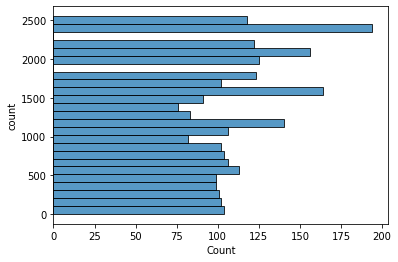

In [53]:
sns.histplot(data=claim_per_provider,y='count',bins=25)

In [54]:
claim_per_provider.mean()

count    1306.5
dtype: float64

In [55]:
claim_per_provider.min()

Provider    PRV51001
count              1
dtype: object

In [56]:
claim_per_provider.max()

Provider    PRV57757
count         2553.5
dtype: object

In [57]:
bene_per_claim = inpatient.groupby(by=['BeneID'])['ClaimID'].agg(['count']).rank(ascending=False)
bene_per_claim= bene_per_claim.reset_index()
bene_per_claim

,BeneID,count
0,BENE100002,14451.5
1,BENE100004,3742.5
2,BENE100006,29954.0
3,BENE100007,29954.0
4,BENE100010,3742.5
...,...,...
37413,BENE99965,29954.0
37414,BENE99974,29954.0
37415,BENE99976,29954.0
37416,BENE99984,29954.0


<AxesSubplot:xlabel='count', ylabel='Count'>

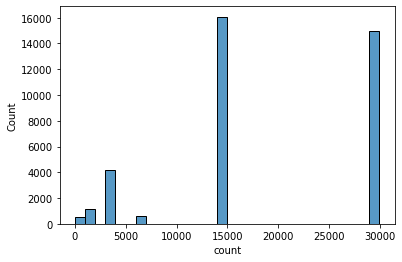

In [58]:
sns.histplot(data=bene_per_claim,x='count',bins=30)

In [59]:
bene_per_claim.mean()

count    18709.5
dtype: float64

In [60]:
bene_per_claim.max()

BeneID    BENE99995
count         29954
dtype: object

In [61]:
bene_per_claim.min()

BeneID    BENE100002
count              1
dtype: object

In [62]:
inpatient['InscClaimAmtReimbursed'].mean()

10086.400484204773

In [63]:
inpatient['InscClaimAmtReimbursed'].max()

125000

In [64]:
inpatient['InscClaimAmtReimbursed'].min()

0

In [65]:
dates= inpatient['ClaimStartDt']

In [66]:
date1=sorted(dates)
date1[76826]

'2009-12-31'

## Value Replacements 

In [67]:
from datetime import date
import numpy as np

### Inpatient Dataset

#### Calculating Number of Days patient was admitted then drop 'AdmissionDt' and 'DischargeDt'. We will do the same to the dates associated with claim dates  

#### Inpatient: Delta to Derive Number of Admit Days

In [68]:
tmp_date= inpatient

In [69]:
tmp_date['AdmissionDt']= pd.to_datetime(tmp_date['AdmissionDt'])

In [70]:
tmp_date['DischargeDt']= pd.to_datetime(tmp_date['DischargeDt'])

In [71]:
tmp_date['AdmitDays']=tmp_date['DischargeDt'] - tmp_date['AdmissionDt']



In [72]:
tmp_date['AdmitDays']= tmp_date['AdmitDays'].apply(lambda x: x.days)

In [73]:
tmp_date.AdmitDays=tmp_date.AdmitDays.astype('int64')
type(tmp_date.iloc[0]['AdmitDays'])

numpy.int64

####  Inpatient: Delta to Derive Number of Claim Days 

In [74]:
tmp_date['ClaimStartDt']= pd.to_datetime(tmp_date['ClaimStartDt'])
tmp_date['ClaimEndDt']= pd.to_datetime(tmp_date['ClaimEndDt'])

In [75]:
tmp_date['ClaimDays']=tmp_date['ClaimEndDt'] - tmp_date['ClaimStartDt']
#tmp_date.ClaimDays=tmp_date.ClaimDays.astype('int64')

In [76]:
tmp_date['ClaimDays']= tmp_date['ClaimDays'].apply(lambda x: x.days)

In [77]:
tmp_date.ClaimDays=tmp_date.ClaimDays.astype('int64')

In [78]:
drop_inp1= ['ClaimEndDt', 'ClaimStartDt','AdmissionDt','DischargeDt' ]

### Recoding  Providers

In [79]:
tmp_date.dtypes

BeneID                                     object
ClaimID                                    object
ClaimStartDt                       datetime64[ns]
ClaimEndDt                         datetime64[ns]
Provider                                   object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
AdmissionDt                        datetime64[ns]
ClmAdmitDiagnosisCode                      object
DeductibleAmtPaid                         float64
DischargeDt                        datetime64[ns]
DiagnosisGroupCode                         object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object


In [80]:
tmp_date.Provider=tmp_date.Provider.astype('str')
tmp_date.iloc[1]['Provider']

'PRV55912'

In [81]:
def remove_prefix(text, prefix):
    if text.startswith(prefix):
        return text[len(prefix):]
    return text

In [82]:
def provider_cleaner(df, col_name, prefix):
    df2= []
    b=len(df)
    for i in range (b):
        text= df.iloc[i][col_name]
        df2.append(remove_prefix(text,prefix))
    return df2 
    
    

In [83]:
tmp_=provider_cleaner(tmp_date,'Provider',"PRV")


In [84]:
tmp_date['Provider_C']=tmp_
tmp_date['Provider_C']= tmp_date['Provider_C'].astype('int64')
tmp_date.dtypes


BeneID                                     object
ClaimID                                    object
ClaimStartDt                       datetime64[ns]
ClaimEndDt                         datetime64[ns]
Provider                                   object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
AdmissionDt                        datetime64[ns]
ClmAdmitDiagnosisCode                      object
DeductibleAmtPaid                         float64
DischargeDt                        datetime64[ns]
DiagnosisGroupCode                         object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object


In [85]:
tmp_date=tmp_date.fillna(0)
tmp_date['DOD'].dtypes

dtype('O')

#### Repeat for 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician' 

In [86]:
tmp_date.AttendingPhysician=tmp_date.AttendingPhysician.astype('str')


In [87]:
tmp_date.OperatingPhysician=tmp_date.OperatingPhysician.astype('str')



In [88]:
tmp_date.OtherPhysician=tmp_date.OtherPhysician.astype('str')


In [89]:
tmp_Attending=provider_cleaner(tmp_date,'AttendingPhysician',"PHY")


In [90]:
tmp_Operating=provider_cleaner(tmp_date,'OperatingPhysician',"PHY")


In [91]:
tmp_Other=provider_cleaner(tmp_date,'OtherPhysician',"PHY")


In [92]:
tmp_date['Attending_P']=tmp_Attending
tmp_date['Attending_P']= tmp_date['Attending_P'].astype('float64')
tmp_date['Attending_P']= tmp_date['Attending_P'].fillna(0)


In [93]:
tmp_date['Operating_P']=tmp_Operating


In [94]:
tmp_date['Operating_P']= tmp_date['Operating_P'].astype('float64')
tmp_date['Operating_P']= tmp_date['Operating_P'].fillna(0)

In [95]:
tmp_date['Other_P']=tmp_Other
tmp_date['Other_P']= tmp_date['Other_P'].astype('float64')
tmp_date['Other_P']= tmp_date['Other_P'].fillna(0)


In [96]:
# New cols added
tmp_date.fillna(0)
tmp_date.isnull().sum()

BeneID                             0
ClaimID                            0
ClaimStartDt                       0
ClaimEndDt                         0
Provider                           0
InscClaimAmtReimbursed             0
AttendingPhysician                 0
OperatingPhysician                 0
OtherPhysician                     0
AdmissionDt                        0
ClmAdmitDiagnosisCode              0
DeductibleAmtPaid                  0
DischargeDt                        0
DiagnosisGroupCode                 0
ClmDiagnosisCode_1                 0
ClmDiagnosisCode_2                 0
ClmDiagnosisCode_3                 0
ClmDiagnosisCode_4                 0
ClmDiagnosisCode_5                 0
ClmDiagnosisCode_6                 0
ClmDiagnosisCode_7                 0
ClmDiagnosisCode_8                 0
ClmDiagnosisCode_9                 0
ClmDiagnosisCode_10                0
ClmProcedureCode_1                 0
ClmProcedureCode_2                 0
ClmProcedureCode_3                 0
C

### Dealing with Claims

In [97]:
base= tmp_date

In [98]:
# Inpatient
tmp_date.ClmAdmitDiagnosisCode=tmp_date.ClmAdmitDiagnosisCode.astype('str')
tmp_date.ClmDiagnosisCode_1=tmp_date.ClmDiagnosisCode_1.astype('str')
tmp_date.ClmDiagnosisCode_2=tmp_date.ClmDiagnosisCode_2.astype('str')
tmp_date.ClmDiagnosisCode_3=tmp_date.ClmDiagnosisCode_3.astype('str')
tmp_date.ClmDiagnosisCode_4=tmp_date.ClmDiagnosisCode_4.astype('str')
tmp_date.ClmDiagnosisCode_5=tmp_date.ClmDiagnosisCode_5.astype('str')
tmp_date.ClmDiagnosisCode_6=tmp_date.ClmDiagnosisCode_6.astype('str')
tmp_date.ClmDiagnosisCode_7=tmp_date.ClmDiagnosisCode_7.astype('str')
tmp_date.ClmDiagnosisCode_8=tmp_date.ClmDiagnosisCode_8.astype('str')
tmp_date.ClmDiagnosisCode_9=tmp_date.ClmDiagnosisCode_9.astype('str')
tmp_date.ClmDiagnosisCode_10=tmp_date.ClmDiagnosisCode_10.astype('str')


In [99]:
list_= ['ClmAdmitDiagnosisCode',
        'ClmDiagnosisCode_1' ,
            'ClmDiagnosisCode_2' ,
            'ClmDiagnosisCode_3' ,
            'ClmDiagnosisCode_4',
            'ClmDiagnosisCode_5',
            'ClmDiagnosisCode_6',
            'ClmDiagnosisCode_7',
            'ClmDiagnosisCode_8',
            'ClmDiagnosisCode_9',
            'ClmDiagnosisCode_10'    
]

In [100]:
def claim_cleaner(df,col_name):
    b=len(df) 
    df2=[]
    for n in range (b):
        text= df.iloc[n][col_name]
        if text[:1].isdigit():
                df2.append(text)
        elif text == 'nan':
            df2.append(text)
        else: 
            text = text.replace(text[0], '99')
            df2.append(text)
    return df2

        


In [101]:
Admit_Code= claim_cleaner(tmp_date,'ClmAdmitDiagnosisCode')

In [102]:
x_1= claim_cleaner(tmp_date,'ClmDiagnosisCode_1')
#x_1

In [103]:
x_2= claim_cleaner(tmp_date,'ClmDiagnosisCode_2')
#x_2

In [104]:
x_3= claim_cleaner(tmp_date,'ClmDiagnosisCode_3')
#x_3

In [105]:
x_4= claim_cleaner(tmp_date,'ClmDiagnosisCode_4')
#x_4

In [106]:
x_5= claim_cleaner(tmp_date,'ClmDiagnosisCode_5')
#x_5

In [107]:
x_6= claim_cleaner(tmp_date,'ClmDiagnosisCode_6')
#x_6

In [108]:
x_7= claim_cleaner(tmp_date,'ClmDiagnosisCode_7')
#x_7

In [109]:
x_8= claim_cleaner(tmp_date,'ClmDiagnosisCode_8')
#x_8

In [110]:
x_9= claim_cleaner(tmp_date,'ClmDiagnosisCode_9')
#x_9

In [111]:
x_10= claim_cleaner(tmp_date,'ClmDiagnosisCode_10')
#x_10

In [112]:
## conca
clean_claims= pd.DataFrame(
    { 'AdmitClmCode':Admit_Code,
     'ClmDCode_1': x_1,
     'ClmDCode_2': x_2,
     'ClmDCode_3': x_3,
     'ClmDCode_4': x_4,
     'ClmDCode_5': x_5,
     'ClmDCode_6': x_6,
     'ClmDCode_7': x_7,
     'ClmDCode_8': x_8,
     'ClmDCode_9': x_9,
     'ClmDCode_10': x_10,
     
    })

In [113]:
clean_claims.columns 


Index(['AdmitClmCode', 'ClmDCode_1', 'ClmDCode_2', 'ClmDCode_3', 'ClmDCode_4',
       'ClmDCode_5', 'ClmDCode_6', 'ClmDCode_7', 'ClmDCode_8', 'ClmDCode_9',
       'ClmDCode_10'],
      dtype='object')

In [114]:
clean_claims[['AdmitClmCode', 'ClmDCode_1', 'ClmDCode_2', 'ClmDCode_3', 'ClmDCode_4',
       'ClmDCode_5', 'ClmDCode_6', 'ClmDCode_7', 'ClmDCode_8', 'ClmDCode_9',
       'ClmDCode_10']]=clean_claims[['AdmitClmCode', 'ClmDCode_1', 'ClmDCode_2', 'ClmDCode_3', 'ClmDCode_4',
       'ClmDCode_5', 'ClmDCode_6', 'ClmDCode_7', 'ClmDCode_8', 'ClmDCode_9',
       'ClmDCode_10']].apply(pd.to_numeric, errors='coerce')

In [115]:
clean_claims.dtypes

AdmitClmCode    int64
ClmDCode_1      int64
ClmDCode_2      int64
ClmDCode_3      int64
ClmDCode_4      int64
ClmDCode_5      int64
ClmDCode_6      int64
ClmDCode_7      int64
ClmDCode_8      int64
ClmDCode_9      int64
ClmDCode_10     int64
dtype: object

In [116]:
#clean_claims

In [117]:
inp_cln= pd.concat([tmp_date, clean_claims], axis=1)
inp_cln.shape


(76827, 71)

In [118]:
 base2= inp_cln

### Derive Age 

In [119]:
inp_cln.DOD=inp_cln.DOD.astype('str')
inp_cln['DOD'].unique()


array(['0', '2009-05-01', '2009-08-01', '2009-07-01', '2009-06-01',
       '2009-12-01', '2009-11-01', '2009-04-01', '2009-10-01',
       '2009-03-01', '2009-09-01', '2009-02-01'], dtype=object)

In [120]:
 def dod_nan (df): 
    df2=[]
    len_df=len(df)
    for i in range (len_df):
        val= df.iloc[i]['DOD']
        if val == '0':
            val= df.iloc[i]['AdmissionDt']
            df2.append(val)
        else: 
            df2.append(val)
    return df2
         

In [121]:
#Should have dates even with entries with original 0 values 
dod_clean= dod_nan(inp_cln)
dod_clean

[Timestamp('2009-04-12 00:00:00'),
 Timestamp('2009-04-12 00:00:00'),
 Timestamp('2009-08-31 00:00:00'),
 Timestamp('2009-08-31 00:00:00'),
 Timestamp('2009-09-17 00:00:00'),
 Timestamp('2009-09-17 00:00:00'),
 Timestamp('2009-02-14 00:00:00'),
 Timestamp('2009-02-14 00:00:00'),
 Timestamp('2009-08-13 00:00:00'),
 Timestamp('2009-08-13 00:00:00'),
 Timestamp('2009-09-09 00:00:00'),
 Timestamp('2009-09-09 00:00:00'),
 Timestamp('2009-10-06 00:00:00'),
 Timestamp('2009-10-06 00:00:00'),
 Timestamp('2008-12-25 00:00:00'),
 Timestamp('2008-12-25 00:00:00'),
 Timestamp('2009-01-02 00:00:00'),
 Timestamp('2009-08-03 00:00:00'),
 Timestamp('2009-08-06 00:00:00'),
 Timestamp('2009-08-06 00:00:00'),
 Timestamp('2009-06-23 00:00:00'),
 Timestamp('2009-06-23 00:00:00'),
 Timestamp('2008-12-29 00:00:00'),
 Timestamp('2009-07-01 00:00:00'),
 Timestamp('2009-09-30 00:00:00'),
 Timestamp('2009-08-26 00:00:00'),
 Timestamp('2009-06-10 00:00:00'),
 Timestamp('2009-06-10 00:00:00'),
 Timestamp('2009-12-

In [122]:
# Dont have to worry about the modifying orig DOD Col since base2=intp_cln will give us the orig state of DOD col
inp_cln['DOD']=dod_clean

In [123]:
inp_cln['DOB']= pd.to_datetime(inp_cln['DOB'])

In [124]:
inp_cln['DOD']= pd.to_datetime(inp_cln['DOD'])

In [125]:
inp_cln['Age']= inp_cln['DOD'] - inp_cln['DOB']

In [126]:
inp_cln['Age']= inp_cln['Age'].apply(lambda x: x.days)

In [127]:
#.astype('int64')
inp_cln['Age']= inp_cln['Age'].astype('int64')

In [128]:
inp_cln['Age']= inp_cln['Age'].apply(lambda x: x/365)

In [129]:
# Resulting value makes sense 
inp_cln.iloc[0]['Age']

66.32328767123288

### DOD 

In [130]:
base2.shape

(76827, 72)

In [131]:
base2['DOD']= base['DOD'].fillna(0)

In [132]:
#.astype('int64')
_dod= base['DOD']
_dod.unique()


array([0, '2009-05-01', '2009-08-01', '2009-07-01', '2009-06-01',
       '2009-12-01', '2009-11-01', '2009-04-01', '2009-10-01',
       '2009-03-01', '2009-09-01', '2009-02-01'], dtype=object)

In [133]:
h= _dod[0]
h

0

In [134]:
x=_dod[20]
#x.isna()
type(x)

int

In [135]:
 def is_dead (val):
    if val == 0:
        val= 0
    else: 
        val= 1
    return val
    
   

In [136]:
#y= _dod.isnull()
y= _dod.apply(lambda x:is_dead(x))

y


0        0
1        0
2        0
3        0
4        0
        ..
76822    0
76823    0
76824    0
76825    0
76826    0
Name: DOD, Length: 76827, dtype: int64

In [137]:
# should have 0 and 1
y.unique()

array([0, 1], dtype=int64)

In [138]:
# Confirm row numbers match 
inp_cln.shape

(76827, 72)

In [139]:
base2.shape

(76827, 72)

In [140]:
inp_cln['DOD_Code']= y



In [141]:
list(inp_cln)

['BeneID',
 'ClaimID',
 'ClaimStartDt',
 'ClaimEndDt',
 'Provider',
 'InscClaimAmtReimbursed',
 'AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'AdmissionDt',
 'ClmAdmitDiagnosisCode',
 'DeductibleAmtPaid',
 'DischargeDt',
 'DiagnosisGroupCode',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'DOB',
 'DOD',
 'Gender',
 'Race',
 'RenalDiseaseIndicator',
 'State',
 'County',
 'NoOfMonths_PartACov',
 'NoOfMonths_PartBCov',
 'ChronicCond_Alzheimer',
 'ChronicCond_Heartfailure',
 'ChronicCond_KidneyDisease',
 'ChronicCond_Cancer',
 'ChronicCond_ObstrPulmonary',
 'ChronicCond_Depression',
 'ChronicCond_Diabetes',
 'ChronicCond_IschemicHeart',
 'ChronicCond_Os

In [142]:
merged_cleaned_inp= inp_cln

In [143]:
cols_drop= [ 'ClaimStartDt',
             'ClaimEndDt',
             'Provider',
            'AttendingPhysician',
             'OperatingPhysician',
             'OtherPhysician',
             'AdmissionDt',
             'ClmAdmitDiagnosisCode',
            'ClmDiagnosisCode_1',
             'ClmDiagnosisCode_2',
             'ClmDiagnosisCode_3',
             'ClmDiagnosisCode_4',
             'ClmDiagnosisCode_5',
             'ClmDiagnosisCode_6',
             'ClmDiagnosisCode_7',
             'ClmDiagnosisCode_8',
             'ClmDiagnosisCode_9',
             'ClmDiagnosisCode_10',
            'DOB',
            'DischargeDt',
             'DOD'
           ]

In [144]:
merged_cleaned_inp['RenalDiseaseIndicator']= merged_cleaned_inp['RenalDiseaseIndicator'].astype('int64')

In [145]:
def non_numeric(df, col_name): 
    len_df= len(df)
    df2= []
    for i in range(len_df):
        if df.iloc[i][col_name].isdigit():
            df2.append(df.iloc[i][col_name])
        else: 
            df2.append(1000)
    return df2

In [146]:
# should all be numeric
tmp_n= non_numeric(merged_cleaned_inp, 'DiagnosisGroupCode')
tmp_n

['201',
 '201',
 '750',
 '750',
 '883',
 '883',
 '067',
 '067',
 '975',
 '975',
 '332',
 '332',
 '597',
 '597',
 '661',
 '661',
 '390',
 '379',
 '294',
 '294',
 '564',
 '564',
 '262',
 '857',
 '876',
 '030',
 '202',
 '202',
 '165',
 '165',
 '482',
 '482',
 '882',
 '226',
 '627',
 '627',
 '346',
 '346',
 '167',
 '167',
 '853',
 '853',
 '247',
 '247',
 '198',
 '198',
 '688',
 '175',
 '175',
 '240',
 '240',
 '597',
 '597',
 '206',
 '206',
 '500',
 '712',
 '897',
 '101',
 '307',
 '255',
 '255',
 '255',
 '255',
 '183',
 '302',
 '190',
 '190',
 '884',
 '884',
 '655',
 '655',
 '164',
 '164',
 '368',
 '882',
 '175',
 '175',
 '857',
 '548',
 '548',
 '482',
 '186',
 '186',
 '256',
 '256',
 '216',
 '535',
 '166',
 '884',
 '884',
 '095',
 '095',
 '022',
 '986',
 '357',
 '637',
 '637',
 '102',
 '102',
 '630',
 '630',
 '409',
 '409',
 '316',
 '316',
 '302',
 '302',
 '241',
 '241',
 '230',
 '230',
 '208',
 '541',
 '541',
 '624',
 '624',
 '198',
 '624',
 '869',
 '255',
 '255',
 '698',
 '698',
 '653',


In [147]:
merged_cleaned_inp['DiagnosisGroupCode']=tmp_n

In [148]:
merged_cleaned_inp['DiagnosisGroupCode']= merged_cleaned_inp['DiagnosisGroupCode'].astype('float64')


In [149]:
# dropcols 
merged_cleaned_inp=merged_cleaned_inp.drop(cols_drop,axis=1 )

In [150]:
merged_cleaned_inp.shape

(76827, 52)

In [151]:
# expectation is that all dtypes is numeric except the 2 labels 
list(merged_cleaned_inp.dtypes)

[dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64')]

In [152]:
m=merged_cleaned_inp.drop_duplicates(subset=['ClaimID'], keep= False)
m.shape

(23223, 52)

## Modeling

In [153]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram,ward 
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## PCA Implementation 

In [154]:
x= m.drop(['BeneID','ClaimID',], axis=1)
x

,InscClaimAmtReimbursed,DeductibleAmtPaid,DiagnosisGroupCode,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Gender,...,ClmDCode_3,ClmDCode_4,ClmDCode_5,ClmDCode_6,ClmDCode_7,ClmDCode_8,ClmDCode_9,ClmDCode_10,Age,DOD_Code
16,8000,1068.0,390.0,4576.0,0.0,0.0,0.0,0.0,0.0,1,...,7230,3659,2859,4019,2948,2809,56210,0,69.304110,0
17,6000,1068.0,379.0,9904.0,0.0,0.0,0.0,0.0,0.0,1,...,30000,73300,2766,53081,2851,4439,41401,0,67.717808,0
22,29000,1068.0,262.0,3612.0,4139.0,0.0,0.0,0.0,0.0,2,...,99851,25062,99074,2766,4019,4111,4589,0,62.873973,0
23,102000,1068.0,857.0,9672.0,0.0,0.0,0.0,0.0,0.0,2,...,78552,2762,5849,5990,5601,591,51881,0,63.378082,0
24,30000,1068.0,876.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,27651,7245,60000,7220,53081,4019,30523,0,44.528767,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76730,3000,1068.0,314.0,3893.0,0.0,0.0,0.0,0.0,0.0,2,...,27801,41401,41400,7850,34982,4241,0,0,73.367123,0
76743,30000,1068.0,394.0,4573.0,0.0,0.0,0.0,0.0,0.0,1,...,1962,2875,56729,2761,5939,1985,41401,0,70.772603,0
76782,6000,1068.0,58.0,113.0,0.0,0.0,0.0,0.0,0.0,1,...,7843,2449,2724,0,0,0,0,0,75.539726,0
76813,4000,1068.0,199.0,0.0,0.0,0.0,0.0,0.0,0.0,2,...,27801,3090,70722,99854,43811,99441,4941,0,69.452055,0


In [155]:
x.shape

(23223, 50)

In [157]:
#y= merged_cleaned_inp[['BeneID','ClaimID']]
y= m['ClaimID']

y

16       CLM32075
17       CLM62376
22       CLM31519
23       CLM57949
24       CLM70083
           ...   
76730    CLM35365
76743    CLM48020
76782    CLM69686
76813    CLM44472
76822    CLM67124
Name: ClaimID, Length: 23223, dtype: object

In [158]:
#Smaller Datasets 
x1= x
y1= y
y1

16       CLM32075
17       CLM62376
22       CLM31519
23       CLM57949
24       CLM70083
           ...   
76730    CLM35365
76743    CLM48020
76782    CLM69686
76813    CLM44472
76822    CLM67124
Name: ClaimID, Length: 23223, dtype: object

In [ ]:
x1.shape

In [ ]:
scaler = StandardScaler().fit(x)

In [ ]:
x_inp_scaled=scaler.transform(x1)
x1_scaled=scaler.transform(x1)

In [ ]:
x_inp_scaled.shape

In [ ]:
### PCA when C=30 using full dataset

In [ ]:
pca=PCA(26).fit(x_inp_scaled)

In [ ]:
print(pca.explained_variance_ratio_,":","sum:",pca.explained_variance_ratio_.sum())

In [ ]:
## Explained VARIANCE 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

As seen above, c=30 yields a resonable cummulative explained variance score. However, this function took approximately 10 minutes to run. Hence, it is woth exploring how a smaller dataset compares. 

In [ ]:
pcax1=PCA(50).fit(x1_scaled)

In [ ]:
print(pcax1.explained_variance_ratio_,":","sum:",pcax1.explained_variance_ratio_.sum())

In [ ]:
## Explained VARIANCE 
plt.plot(np.cumsum(pcax1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

As seen seen above, the smaller dataset yielded similar results when c=28

### Analyzing trends with Individual Components

In [ ]:
for a,b in zip(x.columns,pca.components_[20]):
     
    print(a,":",b.round(3))
 

In [ ]:
for a,b in zip(x.columns,pcax1.components_[0]):
     
    print(a,":",b.round(3))

In [ ]:
for a,b in zip(x.columns,pca.components_[29]):
    print(a,":",b.round(3))

In [ ]:
for a,b in zip(x.columns,pcax1.components_[27]):
    print(a,":",b.round(3))

### Graph the Components

#### Model with full dataset 

In [ ]:
pc_coords=pca.transform(x_inp_scaled)


In [ ]:
# the whole dataset when c=30
fig, ax = plt.subplots(figsize=(100,100))
xx=pc_coords[0:,0]
yy=pc_coords[0:,1]
#zz= pc_coords[0:1000,2]
ax.scatter(xx,yy)
for i,txt in enumerate(y):
    ax.annotate(txt, (xx[i], yy[i]))

### It is aparent that there is a main focal point and the surrounding area with sparse number of claims. The following graphs offer a closer look at this clear seperation 

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
xx=pc_coords[0:10000,0]
yy=pc_coords[0:10000,1]
ax.scatter(xx,yy)
for i,txt in enumerate(y[0:10000]):
    ax.annotate(txt, (xx[i], yy[i]))

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
xx=pc_coords[0:1000,0]
yy=pc_coords[0:1000,1]
ax.scatter(xx,yy)
for i,txt in enumerate(y[0:1000]):
    ax.annotate(txt, (xx[i], yy[i]))

### Let us see how the model with less data but similar cummulative varaince scor compare with graphs above. 

In [ ]:
pc30_coords=pca30.transform(x1_scaled)
pc30_coords

In [ ]:
# Smaller dataset when c= 28
fig, ax = plt.subplots(figsize=(100,100))
xx=pc30_coords[:,0]
yy=pc30_coords[:,1]
ax.scatter(xx,yy)
for i,txt in enumerate(y1):
    ax.annotate(txt, (xx[i], yy[i]))

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
xx=pc30_coords[:2000,0]
yy=pc30_coords[:2000,1]
ax.scatter(xx,yy)
for i,txt in enumerate(y1[0:2000]):
    ax.annotate(txt, (xx[i], yy[i]))

In [ ]:
plt.scatter(pc_coords[:,0],pc_coords[:,1],c= 'orange',cmap='rainbow',)

In [ ]:
#### The graphical pattern from the full dataset seems to be present in the small one as well. 

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### K Means 

In [ ]:
x_s= x
y_s= y

In [ ]:
xs_scaled=scaler.transform(x_s)

In [ ]:
x_inp_kmeans = KMeans(n_clusters=35,random_state=0).fit(xs_scaled)

In [ ]:
y_kmeans = x_inp_kmeans.predict(xs_scaled)

In [ ]:
kmeans20 = KMeans(n_clusters=20,random_state=0).fit(xs_scaled)

In [ ]:
def km_mse(inputs,k):
    mse=[]
    for i in range(1,k):
        errors=[]
        kmeans = KMeans(n_clusters=i, n_init=50,random_state=0).fit(inputs)
        for pt,lab in zip(inputs,kmeans.labels_):
            errors.append(np.linalg.norm(pt-kmeans.cluster_centers_[lab])**2)
        mse.append(np.mean(errors))
    return mse

In [ ]:
inp_mse=km_mse(xs_scaled,35)
inp_mse


In [ ]:
mse20=km_mse(xs_scaled,20)
mse20

In [ ]:
plt.plot(list(range(1,35)),inp_mse)

In [ ]:
plt.plot(list(range(1,20)),mse20)

#### While we are not expecting a balanced distribution among the clusters per se, it seems that with larger values of k, each cluster tend to be either very high or low which indicates a natural grouping that is occuring that perhaps we can better see if k is small. 

In [ ]:
## See how balanced the distribution among clusters 
for i in range(4):
    print(i+1,":",(x_inp_kmeans.labels_==i).sum())

In [ ]:
for i in range(20):
    print(i+1,":",(kmeans20.labels_==i).sum())

In [ ]:
cx=kmeans20.cluster_centers_[:,0]
cy=kmeans20.cluster_centers_[:,1]

In [ ]:
plt.scatter(xs_scaled[:,0],xs_scaled[:,1],c=kmeans20.labels_,cmap='rainbow')
#plt.scatter(cx,cy,marker="^",c='r',s=150,edgecolor='w')

In [ ]:
label = kmeans20.fit_predict(xs_scaled)

In [ ]:
#filter rows of original data
filtered_label2 = xs_scaled[label == 0]
 
filtered_label8 = xs_scaled[label == 1]

filtered_label1 = xs_scaled[label == 2]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'blue')
plt.show()

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs_scaled[label == 0,0],xs_scaled[label == 0,1],xs_scaled[label == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(xs_scaled[label == 1,0],xs_scaled[label == 1,1],xs_scaled[label == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(xs_scaled[label == 2,0],xs_scaled[label == 2,1],xs_scaled[label == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(xs_scaled[label == 3,0],xs_scaled[label == 3,1],xs_scaled[label == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
#ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
#ax.set_xlabel('Age of a customer-->')
#ax.set_ylabel('Anual Income-->')
#ax.set_zlabel('Spending Score-->')
ax.legend()
plt.show()

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs_scaled[label == 0,0],xs_scaled[label == 0,1],xs_scaled[label == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(xs_scaled[label == 1,0],xs_scaled[label == 1,1],xs_scaled[label == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(xs_scaled[label == 2,0],xs_scaled[label == 2,1],xs_scaled[label == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(xs_scaled[label == 3,0],xs_scaled[label == 3,1],xs_scaled[label == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")

ax.scatter(xs_scaled[label == 4,0],xs_scaled[label == 4,1],xs_scaled[label == 4,2], 
           s = 40 , color = 'purple', label = "cluster 4")
ax.scatter(xs_scaled[label == 5,0],xs_scaled[label == 5,1],xs_scaled[label == 5,2], 
           s = 40 , color = 'pink', label = "cluster 5")
ax.scatter(xs_scaled[label == 6,0],xs_scaled[label == 6,1],xs_scaled[label == 6,2], 
           s = 40 , color = 'lightcoral', label = "cluster 6")
ax.scatter(xs_scaled[label == 7,0],xs_scaled[label == 7,1],xs_scaled[label == 7,2], 
           s = 40 , color = 'grey', label = "cluster 7")
ax.scatter(xs_scaled[label == 8,0],xs_scaled[label == 8,1],xs_scaled[label == 8,2], 
           s = 40 , color = 'olive', label = "cluster 8")
ax.scatter(xs_scaled[label == 9,0],xs_scaled[label == 9,1],xs_scaled[label == 9,2], 
           s = 40 , color = 'indigo', label = "cluster 9")
ax.scatter(xs_scaled[label == 10,0],xs_scaled[label == 10,1],xs_scaled[label == 10,2], 
           s = 40 , color = 'lime', label = "cluster 10")
ax.scatter(xs_scaled[label == 11,0],xs_scaled[label == 11,1],xs_scaled[label == 11,2], 
           s = 40 , color = 'bisque', label = "cluster 11")
ax.scatter(xs_scaled[label == 12,0],xs_scaled[label == 12,1],xs_scaled[label == 12,2], 
           s = 40 , color = 'peru', label = "cluster 12")
ax.scatter(xs_scaled[label == 13,0],xs_scaled[label == 13,1],xs_scaled[label == 13,2], 
           s = 40 , color = 'orchid', label = "cluster 13")
ax.scatter(xs_scaled[label == 14,0],xs_scaled[label == 14,1],xs_scaled[label == 14,2], 
           s = 40 , color = 'gold', label = "cluster 14")
ax.scatter(xs_scaled[label == 15,0],xs_scaled[label == 15,1],xs_scaled[label == 15,2], 
           s = 40 , color = 'darkcyan', label = "cluster 15")
ax.scatter(xs_scaled[label == 16,0],xs_scaled[label == 16,1],xs_scaled[label == 16,2], 
           s = 40 , color = 'aqua', label = "cluster 16")
ax.scatter(xs_scaled[label == 17,0],xs_scaled[label == 17,1],xs_scaled[label == 17,2], 
           s = 40 , color = 'navy', label = "cluster 17")
ax.scatter(xs_scaled[label == 18,0],xs_scaled[label == 18,1],xs_scaled[label == 18,2], 
           s = 40 , color = 'royalblue', label = "cluster 18")
ax.scatter(xs_scaled[label == 19,0],xs_scaled[label == 19,1],xs_scaled[label == 19,2], 
           s = 40 , color = 'deepskyblue', label = "cluster 19")


#ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
#ax.set_xlabel('Age of a customer-->')
#ax.set_ylabel('Anual Income-->')
#ax.set_zlabel('Spending Score-->')
ax.legend()
plt.show()